# Lab 10-1 MNIST with CNN (Keras)
* MNIST(Modified National Institute of Standards and Technology database)는 0~9까지의 손으로 쓴 숫자들로 이루어진 대형 데이터베이스
* Optimizer 비교 

### 기본 Library 선언 및 Tensorflow 버전 확인

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

print(tf.__version__)

2.0.0


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [73]:
# Visualize training results
# 네트워크 학습후 결과를 시각화
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(training_epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [ ]:
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

### Tensorflow 2.0 버전에 맞게 Keras를 활용한 MNIST를 분류 모델 생성

### Hyper Parameters

In [32]:
learning_rate = 0.01
training_epochs = 5
batch_size = 100

tf.random.set_seed(777)

### Datasets

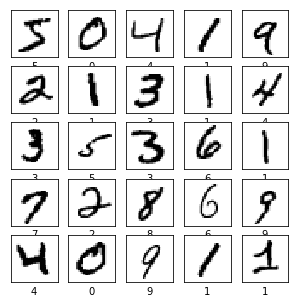

In [33]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

train_images = train_images.astype(np.float32) / 255.
test_images = test_images.astype(np.float32) / 255.

class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
    

train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

###  Tensorflow Keras
#### 위 Data를 기준으로 CNN분류 모델 생성
* Tensorflow keras API를 통해 모델에 대한 정의

* (1)Adam Optimizer

In [65]:
model1 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [66]:
model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [67]:
history11 = model1.fit(train_images, train_labels, validation_data=(test_images, test_labels), 
                       batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 567us/sample - loss: 0.1529 - accuracy: 0.9540 - val_loss: 0.0455 - val_accuracy: 0.9855
Epoch 2/5
60000/60000 [==============================] - 34s 565us/sample - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 3/5
60000/60000 [==============================] - 34s 563us/sample - loss: 0.0309 - accuracy: 0.9900 - val_loss: 0.0244 - val_accuracy: 0.9913
Epoch 4/5
60000/60000 [==============================] - 34s 564us/sample - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0265 - val_accuracy: 0.9908
Epoch 5/5
60000/60000 [==============================] - 34s 561us/sample - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9899


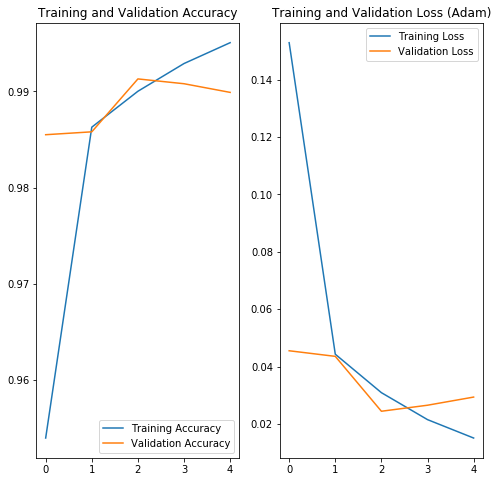

In [68]:
plot_history(history11)

* (2)SGD Optimizer

In [69]:
model2 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [70]:
model2.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [71]:
history22 = model2.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 34s 565us/sample - loss: 1.0137 - accuracy: 0.7271 - val_loss: 0.3025 - val_accuracy: 0.9150
Epoch 2/5
60000/60000 [==============================] - 34s 567us/sample - loss: 0.2799 - accuracy: 0.9157 - val_loss: 0.1893 - val_accuracy: 0.9447
Epoch 3/5
60000/60000 [==============================] - 34s 572us/sample - loss: 0.1990 - accuracy: 0.9396 - val_loss: 0.1444 - val_accuracy: 0.9564
Epoch 4/5
60000/60000 [==============================] - 34s 564us/sample - loss: 0.1583 - accuracy: 0.9527 - val_loss: 0.1183 - val_accuracy: 0.9650
Epoch 5/5
60000/60000 [==============================] - 34s 569us/sample - loss: 0.1323 - accuracy: 0.9593 - val_loss: 0.1015 - val_accuracy: 0.9675


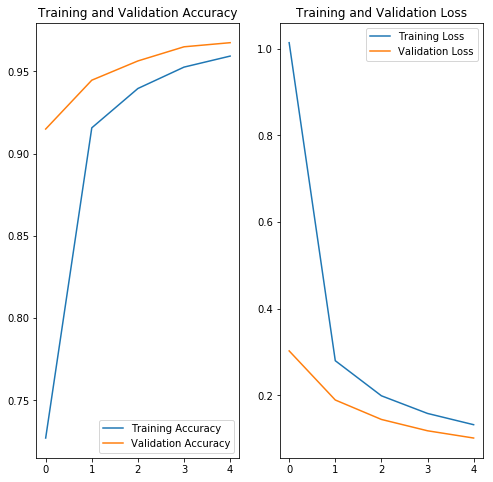

In [74]:
plot_history(history22)

* (3)RMSprop Optimizer

In [75]:
model3 = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling2D(),

    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dropout(0.2),
    Dense(10, activation=tf.nn.softmax)
])

In [76]:
model3.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [77]:
history33 = model3.fit(train_images, train_labels, validation_data=(test_images, test_labels), batch_size=batch_size, epochs=training_epochs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 39s 657us/sample - loss: 0.1487 - accuracy: 0.9533 - val_loss: 0.0361 - val_accuracy: 0.9877
Epoch 2/5
60000/60000 [==============================] - 39s 649us/sample - loss: 0.0421 - accuracy: 0.9868 - val_loss: 0.0264 - val_accuracy: 0.9906
Epoch 3/5
60000/60000 [==============================] - 38s 637us/sample - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0364 - val_accuracy: 0.9869
Epoch 4/5
60000/60000 [==============================] - 38s 636us/sample - loss: 0.0211 - accuracy: 0.9937 - val_loss: 0.0248 - val_accuracy: 0.9916
Epoch 5/5
60000/60000 [==============================] - 39s 646us/sample - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0255 - val_accuracy: 0.9925


## Visualize training results

#### 네트워크 학습후 결과를 시각화

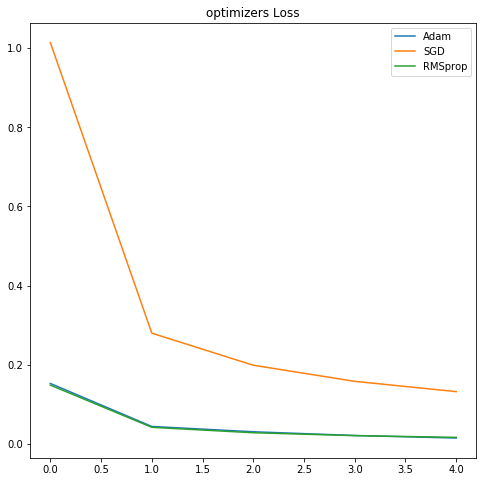

In [78]:

loss1=history11.history['loss']
loss2=history22.history['loss']
loss3=history33.history['loss']

epochs_range = range(training_epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, loss1, label='Adam')
plt.plot(epochs_range, loss2, label='SGD')
plt.plot(epochs_range, loss3, label='RMSprop')
plt.legend(loc='upper right')
plt.title('optimizers Loss')
plt.show()

In [97]:
#model save
# 전체 모델을 HDF5 파일로 저장합니다.
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'

del model  # deletes the existing model

# returns a compiled model
# identical to the previous one
# 가중치와 옵티마이저를 포함하여 정확히 같은 모델을 다시 만듭니다.
model = tf.keras.models.load_model('my_model.h5')

In [98]:
 #모델을 평가할 Test 데이타에 대한 정의
print("Model Test")
score = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {score[1]*100}")

Model Test
10000/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 99.30999875068665
